# Machine Learning Assignment 2

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2e
from sklearn.metrics import explained_variance_score as evs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Part A: Data Cleaning



###### 1) We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:

- T_degC (water temperature)
- Salnty (salinity of water)
- STheta (density of water)
- O2ml_L (milliliters of dissolved oxygen per liter of water)
- Depthm (depth in meters)



In [2]:
dataset = pd.read_csv('bottle.csv')
dataset.shape

/Users/bharadwajkacharla/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(864863, 74)

In [3]:
dataset_copy = dataset[['T_degC','Salnty','STheta','O2ml_L','Depthm']]
dataset_copy.head()

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.50,33.440,25.649,NaN,0
1,10.46,33.440,25.656,NaN,8
2,10.46,33.437,25.654,NaN,10
3,10.45,33.420,25.643,NaN,19
4,10.45,33.421,25.643,NaN,20


###### 2) Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
- Shape of your data should be: (661268, 5)



In [4]:
print(dataset_copy.isnull().sum())

T_degC     10963
Salnty     47354
STheta     52689
O2ml_L    168662
Depthm         0
dtype: int64


In [5]:
# Removing the null values

dataset_copy = dataset_copy[dataset_copy['T_degC'].notna()]
dataset_copy = dataset_copy[dataset_copy['Salnty'].notna()]
dataset_copy = dataset_copy[dataset_copy['STheta'].notna()]
dataset_copy = dataset_copy[dataset_copy['O2ml_L'].notna()]
dataset_copy = dataset_copy[dataset_copy['Depthm'].notna()]

print(dataset_copy.isnull().sum())


T_degC    0
Salnty    0
STheta    0
O2ml_L    0
Depthm    0
dtype: int64


In [6]:
dataset_copy.shape

(661268, 5)

###### 3) Remove any STheta outliers (same as HW #1).
- Shape of your data should be: (661268, 5)
- Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own.

<Figure size 720x504 with 0 Axes>

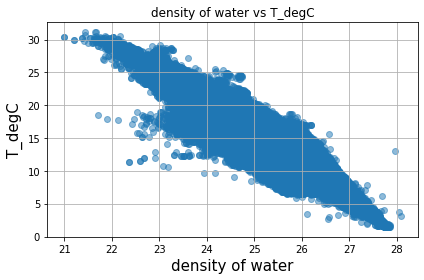

In [7]:
# Building scatter plots using matplotlib
## a) Scatter: Salnty (salinity of water) vs T_degC
plt.figure(figsize=(10, 7))  
fig, ax = plt.subplots()
ax.scatter(dataset_copy[['STheta']], dataset_copy[['T_degC']], alpha=0.5)

ax.set_xlabel('density of water', fontsize=15)
ax.set_ylabel('T_degC', fontsize=15)
ax.set_title('density of water vs T_degC')

ax.grid(True)
fig.tight_layout()

plt.show()

Based on the above plot we can observe that they aren't any outliers present. So we wouldn't be doing any outlier treatment

In [8]:
dataset_copy.shape

(661268, 5)

### Part B: Train / Test Split & Scaling






###### 1) Create X & y objects:

- X object should be all 4 predictors. Shape should be: (661268, 4)

- y object should be just your target variable (T_degC): Shape should be: (661268, 1)

Part B: Train / Test Split & Scaling  
Hint for y: You will need to specify the shape you want. Trying converting y to a numpy array, and then using the .reshape() method.




In [9]:
# Splitting training and testing dataset into train and test
from sklearn.model_selection import train_test_split
X = dataset_copy[['STheta','Salnty','O2ml_L','Depthm']]
y = dataset_copy [['T_degC']]

In [10]:
print(X.shape)
print(y.shape)

(661268, 4)
(661268, 1)


###### 2) Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

###### 3) Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.

Additional info on scaling with train & test sets: https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i (Links to an external site.)

The easiest approach is to use the sklearn tool "StandardScaler" - more info here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html (Links to an external site.)

You should create two new X objects:
- X_train_scaled
- X_test_scaled.

Note: X_test_scaled must use the scaling parameters learned from training data.


In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [13]:
type(X_train_scaled)

numpy.ndarray

### Part C: Linear Regression with sklearn








###### 1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.


In [14]:
#Logistic Regression
lin_reg = LinearRegression()

#fit all the data into the classifier
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

###### 2) Print out the coefficients (including the intercept)


In [15]:
print('The coefficeints of the model are ', lin_reg.coef_)
print('The intercept of the model is ', lin_reg.intercept_)

The coefficeints of the model are  [[-4.6352733   1.63031654  0.30143066 -0.47545383]]
The intercept of the model is  [10.91960927]


###### 3) Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!
- Call predictions y_pred_sklearn



In [16]:
#output the classifiers prediction
y_pred_sklearn = lin_reg.predict(X_test_scaled)
y_pred_sklearn

array([[ 9.27182305],
       [16.71755588],
       [21.61303068],
       ...,
       [ 9.12073217],
       [13.78469605],
       [21.69728495]])


###### 4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance


In [17]:
mean_square_error = mse(y_test, y_pred_sklearn)#mean_squared_error.sum
print('Mean square error is', mean_square_error)
rsquared = r2e(y_test, y_pred_sklearn)
print('r-square error is', rsquared)
explained_variance = evs(y_test, y_pred_sklearn)
print('Explained variance is', explained_variance)


Mean square error is 0.10978782640186772
r-square error is 0.9938261017545645
Explained variance is 0.993832006003576


###### 5) Create a scatterplot that shows actual versus predicted values for the T_degC.


<Figure size 720x504 with 0 Axes>

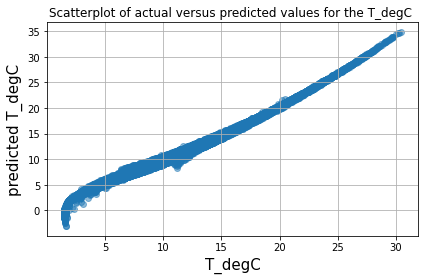

In [18]:
plt.figure(figsize=(10, 7))  
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_sklearn, alpha=0.5)

ax.set_xlabel('T_degC', fontsize=15)
ax.set_ylabel('predicted T_degC', fontsize=15)
ax.set_title('Scatterplot of actual versus predicted values for the T_degC ')

ax.grid(True)
fig.tight_layout()

plt.show()

### Part D: Gradient Descent Mini-Batch

##### Please make sure you are using Mini-Batch! Perform the following six steps for mini-batch sizes of: 50, 250, & 2000. Save all outputs

- Similar to HW #1, you will need to add a column of 1s to X_train_scaled and X_test_scaled.

- The cost function we will use for Gradient Descent is MSE (refer to Equation 4-3 in Hands-On Machine Learning Chapter 4).

In [19]:
X_train_scaled_new = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]  # add x0 = 1 to each instance
X_test_scaled_new = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]  # add x0 = 1 to each instance

###### 3) Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.


In [20]:
def mini_batch_gradient_descent(X_b, y, n_epochs, minibatch_size, eta):
    m = len(X_b)
    
    np.random.seed(120)
    thetas = np.random.randn(5, 1)
    
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        shuffled_indices = list(shuffled_indices)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y.iloc[shuffled_indices]
        y_shuffled = np.asarray(y_shuffled).reshape(len(y_shuffled),1)
        for i in range(0, m, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2*xi.T.dot(xi.dot(thetas) - yi)/minibatch_size
            
            thetas = thetas - eta*gradients

    return thetas

In [21]:
n_epochs = 100
minibatch_size = 50
eta = 0.1

theta_50 = mini_batch_gradient_descent(X_train_scaled_new, y_train, n_epochs, minibatch_size, eta)

print("Mini-batch Gradient descent with 50 minibatch size")
print(theta_50)

Mini-batch Gradient descent with 50 minibatch size
[[10.92562577]
 [-4.65858975]
 [ 1.65267222]
 [ 0.30178014]
 [-0.48415196]]


In [22]:
n_epochs = 100
minibatch_size = 250
eta = 0.1

theta_250 = mini_batch_gradient_descent(X_train_scaled_new, y_train, n_epochs, minibatch_size, eta)

print("Mini-batch Gradient descent with 250 minibatch size")
print(theta_250)

Mini-batch Gradient descent with 250 minibatch size
[[10.92164703]
 [-4.6701164 ]
 [ 1.64713369]
 [ 0.29602443]
 [-0.45647761]]


In [23]:
n_epochs = 100
minibatch_size = 2000
eta = 0.1

theta_2000 = mini_batch_gradient_descent(X_train_scaled_new, y_train, n_epochs, minibatch_size, eta)

print("Mini-batch Gradient descent with 2000 minibatch size")
print(theta_2000)

Mini-batch Gradient descent with 2000 minibatch size
[[10.92293802]
 [-4.64950971]
 [ 1.64277826]
 [ 0.30081687]
 [-0.4621097 ]]


###### 4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

In [24]:
y_predict_50 = X_test_scaled_new.dot(theta_50)
y_predict_50

array([[ 9.27664933],
       [16.74648175],
       [21.70239312],
       ...,
       [ 9.12358497],
       [13.79799358],
       [21.78349584]])

In [25]:
# mean squared error
mse(y_test, y_predict_50)

0.1107342518319917

In [26]:
# r-squared
r2e(y_test, y_predict_50)

0.9937728796943965

In [27]:
# explained variance
evs(y_test, y_predict_50)

0.9937877531409642

##### For  mini_batch of size 250

In [28]:
y_predict_250 = X_test_scaled_new.dot(theta_250)
y_predict_250

array([[ 9.24159534],
       [16.73907851],
       [21.68979593],
       ...,
       [ 9.11168064],
       [13.78029058],
       [21.76829257]])

In [29]:
# mean squared error
mse(y_test, y_predict_250)

0.11033935600331359

In [30]:
# r-squared
r2e(y_test, y_predict_250)

0.9937950865887646

In [31]:
# explained variance
evs(y_test, y_predict_250)

0.9938035727220046

##### For  mini_batch of size 2000


In [32]:
y_predict_2000 = X_test_scaled_new.dot(theta_2000)
y_predict_2000

array([[ 9.26135984],
       [16.72439329],
       [21.65371726],
       ...,
       [ 9.12077079],
       [13.77947516],
       [21.73563465]])

In [33]:
# mean squared error
mse(y_test, y_predict_2000)

0.10990908381998651

In [34]:
# r-squared
r2e(y_test, y_predict_2000)

0.9938192828659363

In [35]:
# explained variance
evs(y_test, y_predict_2000)

0.9938296463846135

##### 5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data



###### For  mini_batch of size 50

Text(0.5, 0, 'Predicted values for mini_batch size 50')

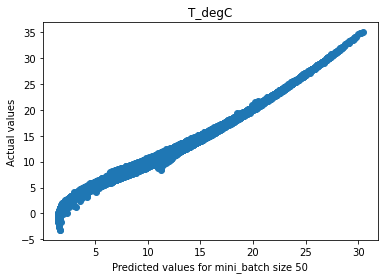

In [36]:
plt.scatter(y_test, y_predict_50)
plt.title('T_degC')
plt.ylabel('Actual values')
plt.xlabel('Predicted values for mini_batch size 50')

##### For  mini_batch of size 250



Text(0.5, 0, 'Predicted values for mini_batch size 250')

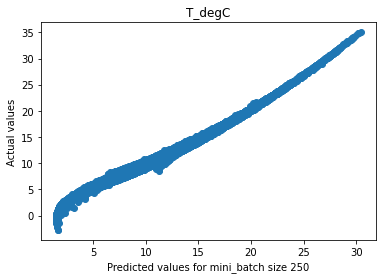

In [37]:
plt.scatter(y_test, y_predict_250)
plt.title('T_degC')
plt.ylabel('Actual values')
plt.xlabel('Predicted values for mini_batch size 250')

##### For  mini_batch of size 2000


Text(0.5, 0, 'Predicted values for mini_batch size 2000')

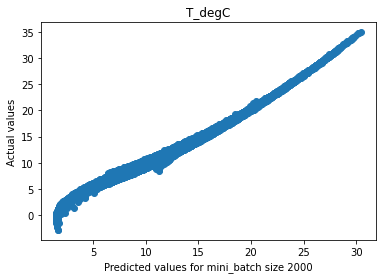

In [38]:
plt.scatter(y_test, y_predict_2000)
plt.title('T_degC')
plt.ylabel('Actual values')
plt.xlabel('Predicted values for mini_batch size 2000')

###### 6) Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data. Calculate the following for the training data:

###### - mean squared error

###### - r-squared

###### - explained variance

###### For  mini_batch of size 50

In [39]:
y_predict_train_50 = X_train_scaled_new.dot(theta_50)
y_predict_train_50

array([[13.01190737],
       [11.1829123 ],
       [ 7.9049659 ],
       ...,
       [ 5.83902349],
       [11.09617084],
       [12.17824384]])

In [40]:
# mean squared error
mse(y_train, y_predict_train_50)

0.11144977570640942

In [41]:
#r squared error
r2e(y_train, y_predict_train_50)

0.9937607204373898

In [42]:
# explained variance
evs(y_train, y_predict_train_50)

0.9937627469182693

###### For  mini_batch of size 250



In [43]:
y_predict_train_250 = X_train_scaled_new.dot(theta_250)
y_predict_train_250

array([[12.99886731],
       [11.17035371],
       [ 7.8971707 ],
       ...,
       [ 5.8511443 ],
       [11.08310484],
       [12.1665184 ]])

In [44]:
# mean squared error
mse(y_train, y_predict_train_250)

0.1114553441112842

In [45]:
# r-squared
r2e(y_train, y_predict_train_250)

0.9937604087020409

In [46]:
# explained variance
evs(y_train, y_predict_train_250)

0.9937606411678996

###### For our mini_batch of size 2000



In [47]:
y_predict_train_2000 = X_train_scaled_new.dot(theta_2000)
y_predict_train_2000 

array([[12.99874157],
       [11.17623407],
       [ 7.90762496],
       ...,
       [ 5.8609938 ],
       [11.08769294],
       [12.16751396]])

In [48]:
# mean squared error
mse(y_train, y_predict_train_2000)

0.11121093529102666

In [49]:
# r-squared
r2e(y_train, y_predict_train_2000)

0.9937740914120103

In [50]:
# explained variance
evs(y_train, y_predict_train_2000)

0.993774711734726

## Part E: Conceptual Questions



#### 1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.



The Normal Equation uses a closed-form equation where the cost function is set to zeroby setting the slope of the cost function w.r.t each of the parameters to Zero. Unlike gradient descent where we employ iterative learning rate, we don't use learning rate or itterative process.

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function (Loss function). To find a local minimum of a function using gradient descent, we need to choose a learning such that the cost function converses to the global minimum. This is an iterative process and works well when the number of features are very large.

#### 2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?



Batch Gradient Descent considers complete dataset for every step of gradient descent. However, if the datset is very huge, it is computationally very expensive to employ this method. Hence, we use stochasticc gradient descent. In Stochastic Gradient Descent, we consider just one example at a time to take a single step of gradient descent.

Mini-Batch Gradient Descent is a compromise between batch GD and SGD. In Mini-Batch Gradient Descent, we update the model based on smaller groups of training samples, instead of computing the gradient from 1 sample or all n training samples, we compute the gradient from 1 < k < n training samples.


#### 3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.



Based on the mean squared error, the best performing version of the gradient descent is the one with mini batch size of 2000.Furthermore, the r-squared and the explained variance are the best compared to the Gradient Descent with mini-batches of lower sizes for our test data.

Following are the metrics for both training and test data set

 - test mean squared error :
0.10990908381998651  
 - test r-squared :
0.9938192828659363  
 - test explained variance :
0.9938296463846135  

 - train mean squared error :
0.11121093529102666  
 - train r-squared :
0.9937740914120103  
 - train explained variance :
0.993774711734726  


Based on the above mentioned metrics, we can observe that even though the explained variance and r-squared for the train data is greater than the test data there's not a significant difference. So, there isn't a sign of overfitting.

#### 4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?


Learning rate is a hyper-parameter that defines the adjustment in the weights of the loss gradient descent. It determines how fast or slow we will move towards the optimal weights.  

It is beneficial to change the learning rate over time, if the learning rate is too small, it takes long time to converge to global minima. On the other hand, if the learning rate is too high the cost function may diverge.

We can overcome this issue by using adaptive learning rate. The simplest implementation is to make the learning rate smaller once the performance of the model converges, such as by decreasing the learning rate by a factor of two or an order of magnitude. Alternately, the learning rate can be increased again if performance does not improve for a fixed number of training epochs.


#### 5) Why would a data scientist want to use early stopping in gradient descent?

Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent.

Too little learning rate  will mean that the model will underfit the train and the test sets. Too much training will mean that the model will overfit the training dataset and have poor performance on the test set.

A compromise is to train on the training dataset but to stop training at the point when performance on a validation dataset starts to degrade. This simple, effective, and widely used approach to training neural networks is called early stopping

The reason a data scientist would use it is to build a model that generalizes well to unseen data and reduces the chance of over-fitting the training data.